### 5. Scikit Learn

#### 5.1 Machine Learning

**Machine learning** involves building mathematical models to help
understand data. “Learning” enters the fray when we give these models tunable
parameters that can be adapted to observed data; in this way the program can be con‐
sidered to be “learning” from the data. Once these models have been fit to previously
seen data, they can be used to predict and understand aspects of newly observed data.

##### Categories of Machine Learning

**Supervised learning** involves somehow modeling the relationship between measured
features of data and some label associated with the data; once this model is deter‐
mined, it can be used to apply labels to new, unknown data. This is further subdivided 
into **classification tasks** and **regression tasks**: in classification, the labels are
discrete categories, while in regression, the labels are continuous quantities. We will
see examples of both types of supervised learning in the following section.

**Unsupervised learning** involves modeling the features of a dataset without reference to
any label, and is often described as “letting the dataset speak for itself.” These models
include tasks such as clustering and dimensionality reduction. **Clustering algorithms** 
identify distinct groups of data, while **dimensionality reduction algorithms** search for
more succinct representations of the data. We will see examples of both types of
unsupervised learning in the following section.

#### 5.2 Introducing Scikit-Learn

##### Data Representation in Scikit-Learn

In [ ]:
# data as a table
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

**Features Matrix** is a two-dimensional numerical array or matrix, with shape [n_samples, n_features], 
and is most often contained in a NumPy array or Pandas DataFrame, and stored in variable X.

**Samples** (i.e., rows) always refer to the individual objects described by the dataset.
For example, the sample might be a flower, a person, a document, an image, a sound
file, a video, an astronomical object, or anything else you can describe with a set of
quantitative measurements.

**Features** (i.e., columns) always refer to the distinct observations that describe
each sample in a quantitative manner. Features are generally real-valued, but may be
Boolean or discrete-valued in some cases.

**Label or Target Array** is one dimensional, with length n_samples, 
and is most often contained in a NumPy arrary or Pandas Series,
and stored in variable y.

In [ ]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', height=1.5)

In [ ]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

In [ ]:
y_iris = iris['species']
y_iris.shape

##### Scikit-Learn's Estimator API

Most commonly, the steps in using the Scikit-Learn estimator API are as follows (we
will step through a handful of detailed examples in the sections that follow):

1. Choose a class of model by importing the appropriate estimator class from Scikit-
Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion
from before.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the model to new data:
    - For supervised learning, often we predict labels for unknown data using the
predict() method.
    - For unsupervised learning, we often transform or infer properties of the data
using the transform() or predict() method.

##### Ex. Supervised Learning: Simple Linear Regression

In [ ]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

# scatter plot
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

In [ ]:
# 1. choose a class of model
from sklearn.linear_model import LinearRegression

# 2. choose model hyperparameters
model = LinearRegression(fit_intercept=True)

# 3. arrange data into features matrix and target vector
X = x[:, np.newaxis]

# 4. fit model to data
model.fit(X, y)

# 5. predict labels for unknown data
xfit = np.linspace(-1, 11)

# transform data to fit into model
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

# visualize the results
plt.scatter(x, y)
plt.plot(xfit, yfit)

##### Ex. Supervised Learning: Naive Bayes Classification

In [ ]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

# 1. choose model class
from sklearn.naive_bayes import GaussianNB

# 2. instantiate model
model = GaussianNB()

# 3. fit model to data
model.fit(Xtrain, ytrain)

# 4. predict on new data
y_model = model.predict(Xtest)

# check accuracy
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

##### Ex. Unsupervised Learning: Dimensionality Reduction

In [ ]:
# 1. choose the model class
from sklearn.decomposition import PCA

# 2. instantiate the model with hyperparameters
model = PCA(n_components=2)

# 3. fit to data
model.fit(X_iris)

# 4. transform the data to two dimensions
X_2D = model.transform(X_iris)

# plot the results
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x='PCA1', y='PCA2', hue='species', data=iris, fit_reg=False)

##### Ex. Unsupervised Learning: Clustering

In [ ]:
# 1. choose the model class
from sklearn.mixture import GaussianMixture

# 2. instantiate the model with hyperparameters
model = GaussianMixture(n_components=3, covariance_type='full')

# 3. fit to data
model.fit(X_iris)

# 4. determine cluster labels
y_gmm = model.predict(X_iris)

# plot the results
iris['cluster'] = y_gmm
sns.lmplot(x='PCA1', y='PCA2', data=iris, hue='species', col='cluster', fit_reg=False)

##### Application: Exploring Handwritten Digits

In [ ]:
# load digits data
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

# visualize the first hundred of these
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

In [ ]:
X = digits.data
X.shape

In [ ]:
y = digits.target
y.shape

In [ ]:

# unsupervised learning: dimensionality reduction
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

# plot the results
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

In [ ]:
# classification on digits

# split data into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

# 1. choose model class
from sklearn.naive_bayes import GaussianNB

# 2. instantiate model
model = GaussianNB()

# 3. fit model to data
model.fit(Xtrain, ytrain)

# 4. predict on new data
y_model = model.predict(Xtest)

# check accuracy
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

In [ ]:
# confusion matrix

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [ ]:
# plot the digits with the predicted labels

fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]), transform=ax.transAxes, color='green' if (ytest[i] == y_model[i]) else 'red')

#### 5.3 Hyperparameters and Model Validation

##### Thinking About Model Validation

In [ ]:
# model validation the wrong way

# load data
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# choose a model and hyperparameters
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

# train the model
model.fit(X, y)
y_model = model.predict(X)

# check the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

In [ ]:
# model validation the right way: holdout sets

# load data and split 50/50
from sklearn.model_selection import train_test_split
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

**Cross Validation** is a sequence of fits where each subset of the data is used both as a training set and as a validation set.

In [ ]:
# model validation via cross-validation
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

In [ ]:
# leave-one-out cross-validation
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

In [ ]:
scores.mean()

##### Selecting the Best Model

If our estimator is underperforming, how should we move forward?
- Use a more complicated/more flexible model
- Use a less complicated/less flexible model
- Gather more training samples
- Gather more data to add features to each sample

##### Bias-Variance Trade off

The best model is optimized in the trade off of bias and variance, 
where **bias** means the model underfits the data, 
and **variance** means the model overfits the data.

In [ ]:
# validation curves

# linear regression and polynomial preprocessor and pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

# create some data
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1./(X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

# visualize the data
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # plot formatting
%matplotlib inline

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best')

In [ ]:
# validation curves in scikit-learn

from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, param_name='polynomialfeatures__degree', param_range=degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

In [ ]:
# from above: optimal model is given by degree=3
# compute and display this fit over the original data

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)

**Note:** that finding the optimal model did not actually require us to compute the training score, 
instead we examined the relationship between the training score and validation score.

<img src="validation-curve.png" />

##### Learning Curves

In [ ]:
# create data
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2)

In [ ]:
# plot validation curve for new data

degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2, param_name='polynomialfeatures__degree', param_range=degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

**Learning curve** is the plot of the training/validation score with respect to the size of the training set.
- a model of given complexity will *overfit* a small dataset: high training score, low validation score
- a model of given complexity will *underfit* a large dataset: will decrease training score, increase validation score
- a model will never (except by chance) give a better score to the validation set than the training set, 
this means the curves should keep getting closer together but never cross.

<img src="learning-curve.png" />

In [ ]:
# learning curves in scikit-learn

from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree), X, y, cv=7, train_sizes=np.linspace(0.3, 1, 25))
    
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray', linestyle='dashed')
    
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

##### Validation in Practice: Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21), 
              'linearregression__fit_intercept': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)
grid.fit(X, y)

In [ ]:
grid.best_params_

In [ ]:
# the best fit model determined via an automatic grid-search

model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)

#### 5.4 Feature Engineering

**Feature Engineering** is taking whatever information you have about your probelm and turning it into numbers that you can use to build your feature matrix.

##### Categorical Features

For **nominal** categorical variables, use **one-hot encoding**  
For **ordinal** categorical variables, use a numeric mapping.

In [ ]:
# create data
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

# straightforward numerical mapping
{'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3}

# one hot encoding using scikit learn
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

In [ ]:
vec.get_feature_names_out()

In [ ]:
# sparse output
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

##### Text Features

In [ ]:
sample = ['problem of evil', 'evil queen', 'horizon problem']

from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

In [ ]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

In [ ]:
# term frequency-inverse document frequency (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

##### Image Features

The simplest approach is what we used for the digits data by simply using the pixel values themselves.

##### Derived Features

In [ ]:
# data that is not well described by a straight line

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y)

In [ ]:
# poor fit straight line

from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit)

In [ ]:
# add polynomial features to the data
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

In [ ]:
# compute linear regression on the transformed features
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit)

This idea of improving a model not by changing the model, but by transforming the inputs, is fundamental to many of the more powerful machine learning methods.

##### Imputation of Missing Data

In [ ]:
from numpy import nan
X = np.array([[ nan, 0, 3 ],
                [ 3, 7, 9 ],
                [ 3, 5, 2 ],
                [ 4, nan, 6 ],
                [ 8, 8, 1 ]])
y = np.array([14, 16, -1,  8, -5])

from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

In [ ]:
model = LinearRegression().fit(X2, y)
model.predict(X2)

##### Feature Pipelines

- Impute the missing values using the mean
- Transform features to quadratic
- Fit a linear regression

In [ ]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(
    SimpleImputer(strategy='mean'), 
    PolynomialFeatures(degree=2), 
    LinearRegression()
)

model.fit(X, y)
print(y)
print(model.predict(X))

#### 5.4 In Depth: Naive Bayes Classification

**Naive Bayes** models are a group of extremely fast and simple classification algorithms that are often suitable for very high dimensional datasets.

##### Bayesian Classification

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

##### Gaussian Naive Bayes

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

One extremely fast way to create a simple model is to assume that the data is described by a Gaussian distribution with no covariance between dimensions.
We can fit this model by simply finding the mean and standard deviation of the points within each label, which is all you need to define such a distribution.

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim)

In [ ]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

##### Multinomial Naive Bayes

**Multinomial distribution** describes the probability of observing counts amoung a number of categories, 
and thus multinomial naive bayes is most appropriate for features that represent counts or count rates.

In [ ]:
# Ex. Classifying Text

from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

In [ ]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)
print(train.data[5])

In [ ]:
# convert text to a vector using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# apply the model to the training data, predict labels for the test data
model.fit(train.data, train.target)
labels = model.predict(test.data)

# confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
# predict category on new data
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [ ]:
predict_category('sending a payload to the ISS')

In [ ]:
predict_category('discussing islam vs atheism')

In [ ]:
predict_category('determining the screen resolution')

##### When to Use Naive Bayes

Advantages of bayesian classifiers:
- They are extremely fast for both training and prediction
- They provide straightforward probabilistic prediction
- They are often very easily interpretable
- They have very few (if any) turnable parameters

Perform well when:
- When the naive assumptions actually match the data (very rare in practice)
- For very well separated categories, when model complexity is less important
- For very high dimensional data, when model complexity is less important

For this reason, simple classifiers like naive bayes tend to work well or better than more complicated classifiers as the dimensionality grows: 
once you have enough data, even a simple model can be very powerful.

#### 5.6 In Depth: Linear Regression

##### Simple Linear Regression

In [ ]:
# data for linear regression
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
%matplotlib inline

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y)

In [ ]:
# linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

In [ ]:
# print relevant parameters
print('Model slope:    ', model.coef_[0])
print('Model intercept:', model.intercept_)

In [ ]:
# example fit
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

##### Basis Function Regression

You can adapt linear regression to nonlinear relationships between variables by transforming the data according to **basis functions**

In [ ]:
# transform 1d array to 3d array
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

In [ ]:
# linear polynomial fit to nonlinear training data
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

In [ ]:
# custom transformer based on scikit-learn
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    '''Uniformly spaced Gaussian features for one-dimensional input'''

    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor

    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20), LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10) 

##### Regularization

The introduction of basis functions intor our linear regression makes the model much more flexible, 
but it can also quickly lead to ovverfitting.

In [ ]:
# an overly complex basis function model that overfits the data
model = make_pipeline(GaussianFeatures(30), LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)

In [ ]:
# the coefficients of the gaussian bases in the overly complex model
def basis_plot(model, title= None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)
        
    ax[1].plot(model.steps[0][1].centers_, model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location', ylabel='coefficient', xlim=(0, 10))

model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

Note the second graph shows the amplitude of the basis function at each location. 
This is typical overfitting behavior when basis functions overlap: the coefficients of adjacent basis functions blow up and cancel each other out.
We limit such spikes explicitly in the model by penalizing large values of the model parameters using **regularization**.

The most common form of regularization is **ridge regression** or **L2 regularization** or **Tikhonov regularization**.
This proceeds by penalizing the sum of squares (2-norms) of the model coefficients.

In [ ]:
# ridge (L2) regularization applied to the overly complex model
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

Another common type of regularization is known as **lasso regression** or **L1 regularization**, 
and involves penalizing the sum of the absolute values (1-norms) of regression coefficients.

In [ ]:
# lasso (L1) regularization applied to the overly complex model
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001)) 
basis_plot(model, title='Lasso Regression')

##### Ex. Predicting Bicycle Traffic

Note this is an example of how the tools of scikit-learn can be used in a statistical modeling framework, in which the parameters of the model are assumed to have interpretable meaning.

/tmp/ipykernel_3399/4180518038.py:26: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  days = (date - pd.datetime(2000, 12, 21)).days


<Axes: xlabel='Date'>

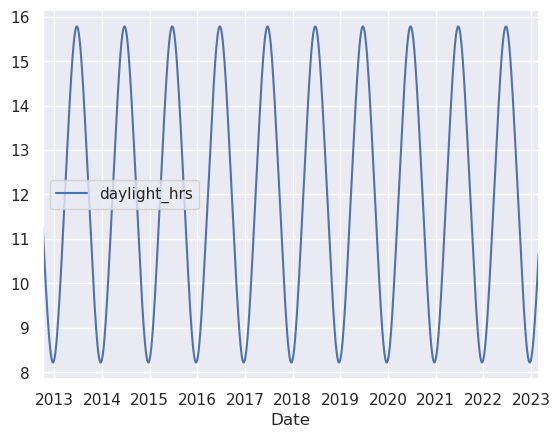

In [24]:
# load the datasets
import pandas as pd
counts = pd.read_csv('fremont_hourly.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('seattle_weather.csv', index_col='DATE', parse_dates=True)

# compute the total daily bicycle traffic
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns

# add binary columns for day of the week
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

# add indicator for holidays
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

# compute hours of daylight
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    '''Compute the hours of daylight for the given date'''
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude)) * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()

In [25]:
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

# join the dataframes
daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

# add a counter column
daily['annual'] = (daily.index - daily.index[0]).days / 365.

# drop any rows with null values
daily.dropna(axis=0, how='any', inplace=True)

daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2023-01-01,1804.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.293679,0.000039,4.05,0.0,10.252055
2023-01-02,2372.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.308456,0.000000,3.95,1.0,10.254795
2023-01-03,3914.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.324523,0.000000,4.30,1.0,10.257534
2023-01-04,3864.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.341865,0.000079,4.50,0.0,10.260274
2023-01-05,3762.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.360469,0.000000,5.35,1.0,10.263014


<Axes: xlabel='Date'>

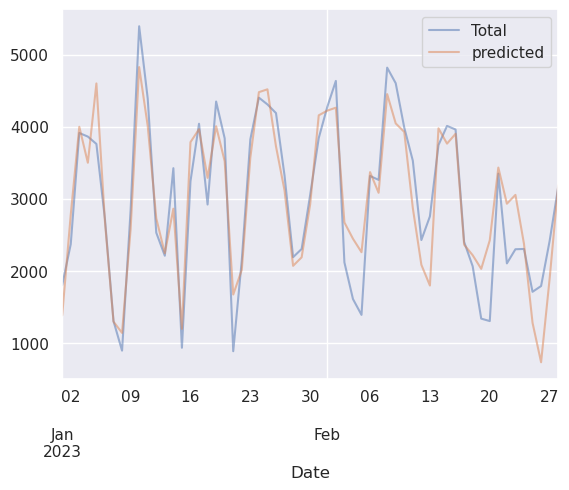

In [26]:
# out model's prediction of bicycle traffic
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday', 'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

daily[['Total', 'predicted']].plot(alpha=0.5)

In [28]:
# coefficients of the model
params = pd.Series(model.coef_, index=X.columns)
params

Mon            -3.404675e+05
Tue            -3.395695e+05
Wed            -3.397612e+05
Thu            -3.398638e+05
Fri            -3.405157e+05
Sat            -3.412543e+05
Sun            -3.413929e+05
holiday        -2.546903e-08
daylight_hrs   -2.223447e+03
PRCP           -8.083602e+05
dry day         4.500751e+02
Temp (C)        7.465058e+02
annual          3.494198e+04
dtype: float64

In [30]:
# compute the root mean square error
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_ for i in range(1000)], 0)

print(pd.DataFrame({'effect': params.round(0), 'error': err.round(0)}))

                effect     error
Mon          -340467.0  114677.0
Tue          -339570.0  114655.0
Wed          -339761.0  114695.0
Thu          -339864.0  114697.0
Fri          -340516.0  115108.0
Sat          -341254.0  115157.0
Sun          -341393.0  114707.0
holiday           -0.0       0.0
daylight_hrs   -2223.0     798.0
PRCP         -808360.0  194054.0
dry day          450.0     204.0
Temp (C)         747.0     215.0
annual         34942.0   11824.0
